<a href="https://colab.research.google.com/github/Gustavo-Martins15/Years-of-Schooling-WorldWide/blob/main/Years_of_Schooling_Worldwide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as  pd
df = pd.read_csv("schooling.csv",sep = ',',
            skipinitialspace = True)
df = df.dropna()
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,ISO3,Country,Continent,Hemisphere,Human_Development_Groups,UNDP_Developing_Regions,HDI_Rank_(2021),Expected_Years_of_Schooling_(1990),Expected_Years_of_Schooling_(1991),Expected_Years_of_Schooling_(1992),...,Expected_Years_of_Schooling_(2012),Expected_Years_of_Schooling_(2013),Expected_Years_of_Schooling_(2014),Expected_Years_of_Schooling_(2015),Expected_Years_of_Schooling_(2016),Expected_Years_of_Schooling_(2017),Expected_Years_of_Schooling_(2018),Expected_Years_of_Schooling_(2019),Expected_Years_of_Schooling_(2020),Expected_Years_of_Schooling_(2021)
0,AFG,Afghanistan,Asia,Northern Hemisphere,Low,SA,180.0,2.504050,2.80655,3.109050,...,9.577323,9.875836,10.174350,10.180150,10.185950,10.19175,10.197550,10.263844,10.263844,10.263844
1,AGO,Angola,Africa,Southern Hemisphere,Medium,SSA,148.0,3.537480,3.32483,3.302090,...,10.082500,10.604900,11.127300,11.649700,12.172090,12.17210,12.172100,12.172100,12.172100,12.172100
2,ALB,Albania,Europe,Northern Hemisphere,High,ECA,67.0,11.602930,11.76358,10.663780,...,14.586650,14.925640,15.252420,15.076300,14.804600,14.81613,14.695620,14.818920,14.448000,14.448000
4,ARE,United Arab Emirates,Asia,Northern Hemisphere,Very High,AS,26.0,10.474560,10.82239,10.659380,...,12.945893,13.064747,13.183602,13.302456,13.421310,14.34410,15.019120,15.694140,15.717690,15.717690
5,ARG,Argentina,America,Southern Hemisphere,Very High,LAC,47.0,13.281041,13.23574,13.190593,...,17.107370,17.091850,17.270140,17.409550,17.668859,17.65420,17.656179,17.874870,17.874870,17.874870


In [3]:
from plotly.express import choropleth
import plotly.express as px
for color in ['Human_Development_Groups', 'UNDP_Developing_Regions','HDI_Rank_(2021)']:
  choropleth(data_frame = df, locations = 'ISO3', color=color).show()

##Number of Countries with years of schooling above average in 1990

<Axes: xlabel='Continent'>

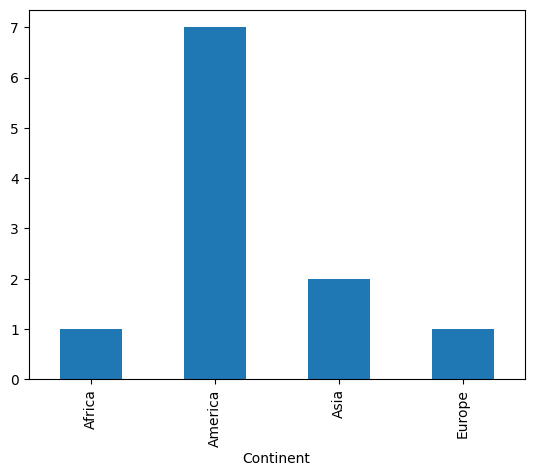

In [4]:
exp_World_Schooling_1990 = df['Expected_Years_of_Schooling_(2021)'].mean() #expected world mean schooling in 1990
df[df['Expected_Years_of_Schooling_(1990)'] > exp_World_Schooling_1990].groupby('Continent').count()['Country'].plot(kind="bar")#countries that have the average year schooling higher or equal to the mean

##Number of Countries with years of schooling above average in 2021


<Axes: xlabel='Continent'>

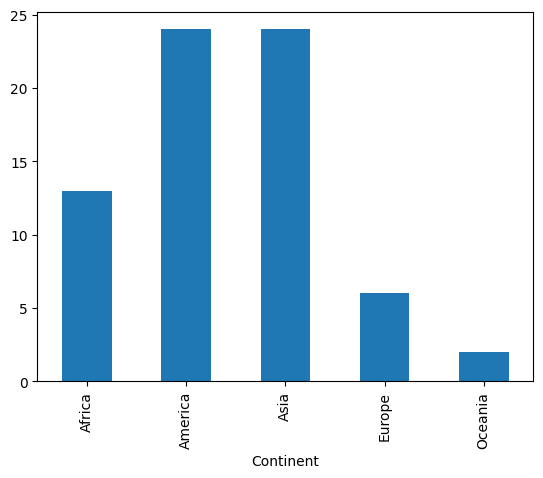

In [5]:
exp_World_Schooling_2021 = df['Expected_Years_of_Schooling_(2021)'].mean() #expected world schooling mean in 2021
df[df['Expected_Years_of_Schooling_(2021)'] > exp_World_Schooling_2021].groupby('Continent').count()['Country'].plot(kind="bar") #countries that have the average year schooling higher or equal to the mean

##Growth Difference per Continent(1990-2021)

In [7]:
df['Growth'] = df['Expected_Years_of_Schooling_(2021)'] - df['Expected_Years_of_Schooling_(1990)']
growth_per_Continent = df.groupby(['Continent'])['Growth'].sum()
px.bar(growth_per_Continent, template="plotly_dark", title="Growth Difference per Continent(1990-2021)")

##Human Development Groups Distribution (2021)

In [6]:
px.histogram(df['Human_Development_Groups'], template='plotly_dark', title='Human Development Groups Distribution')

##Human Development Index(HDI) Per Continent Distribution:

In [13]:
px.box(df, x="Continent", y="HDI_Rank_(2021)", title="Human Development Index(HDI) Per Continent Distribution", template="seaborn")